In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence


In [9]:
#train_file = "/workspaces/Wunder_Challenge/submission/datasets/train.csv"
test_file = "/workspaces/Wunder_Challenge/submission/datasets/test.csv"
#train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
device = torch.device("cpu")


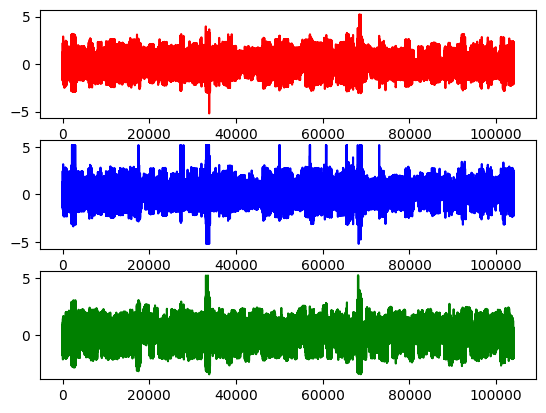

In [6]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(test0, color='red')
axs[1].plot(test1, color='blue')
axs[2].plot(test28, color='green')

In [7]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df):
        # Group by seq_ix; each group is one sequence
        self.groups = [x for _, x in df.groupby("seq_ix")]
        self.feature_cols = df.columns[3:]  # features only

    def __len__(self):
        return len(self.groups)

    def __getitem__(self, idx):
        seq_df = self.groups[idx].sort_values("step_in_seq")
        features = torch.tensor(seq_df[self.feature_cols].values, dtype=torch.float32)
        return features[idx:idx+100], features[idx+100] 

In [13]:
test_dataset = TimeSeriesDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
for epoch in range(5):
    for inputs, targets in test_loader:
        print(targets.shape)

torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
